In [21]:
import pandas as pd
import numpy as np # Tuodaan pandas- ja numpy-kirjasto.
import matplotlib.pyplot as plt # Tuodaan kuvioiden ja kaavioiden peruskirjasto.
%matplotlib inline # Tällä komennolla kaaviot saadaan tulostumaan automaattisesti ilman erillistä komentoa.

plt.style.use('seaborn-whitegrid') # Kaavioiden ulkoasun tyyli.

In [5]:
df = pd.read_csv('http://taanila.fi/sales_data_sample.csv', encoding = 'cp1252') # Tuodaan csv-tiedosto ja avataan viisi ensimmäistä riviä.
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
df1 = pd.crosstab(df['COUNTRY'], 'lkm') # Tehdään taulukko, josta näkyy maittain myyntikerrat.

df1.columns.name='' # Poistetaan turha otsikko.

n = df1['lkm'].sum()
df1['%'] = (df1['lkm']/n)*100 # Lisätään prosentit.

df1.loc['Yhteensä'] = df1.sum() #Tehdään yhteensä-rivi.

df1.style.format({'%': '{:.1f} %'}) # Prosenttilukujen muotoilu.

,lkm,%
COUNTRY,,
Australia,185,6.6 %
Austria,55,1.9 %
Belgium,33,1.2 %
Canada,70,2.5 %
Denmark,63,2.2 %
Finland,92,3.3 %
France,314,11.1 %
Germany,62,2.2 %
Ireland,16,0.6 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %'),
 Text(0, 0, '40 %')]

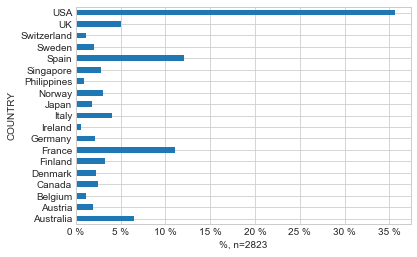

In [11]:
# Tehdään vaakapylväskuvio, josta näkyy ylemmän taulukon tiedot pylväinä.
ax1 = df1.drop('Yhteensä')['%'].plot.barh() # Poistetaan lisäksi yhteensä-rivi.

ax1.set_xlabel('%, n=' + str(n)) # Asetetaan x-akselin nimeksi %.

ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()]) # Viimeistellään prosenttiluvut.


In [12]:
import seaborn as sns # Tuodaan seaborn-kirjasto.

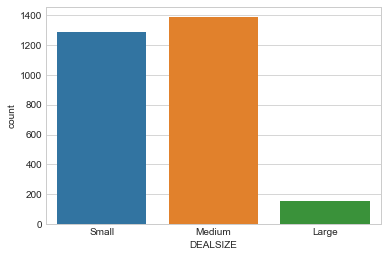

In [20]:
sns.countplot(df['DEALSIZE']) # Tehdään pylväskuvio, josta näkyy jakauma kauppojen kokojen välillä.